<a href="https://colab.research.google.com/github/sayonaramagalhaes/Atividade-ML---terceira/blob/main/VisualizarGradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

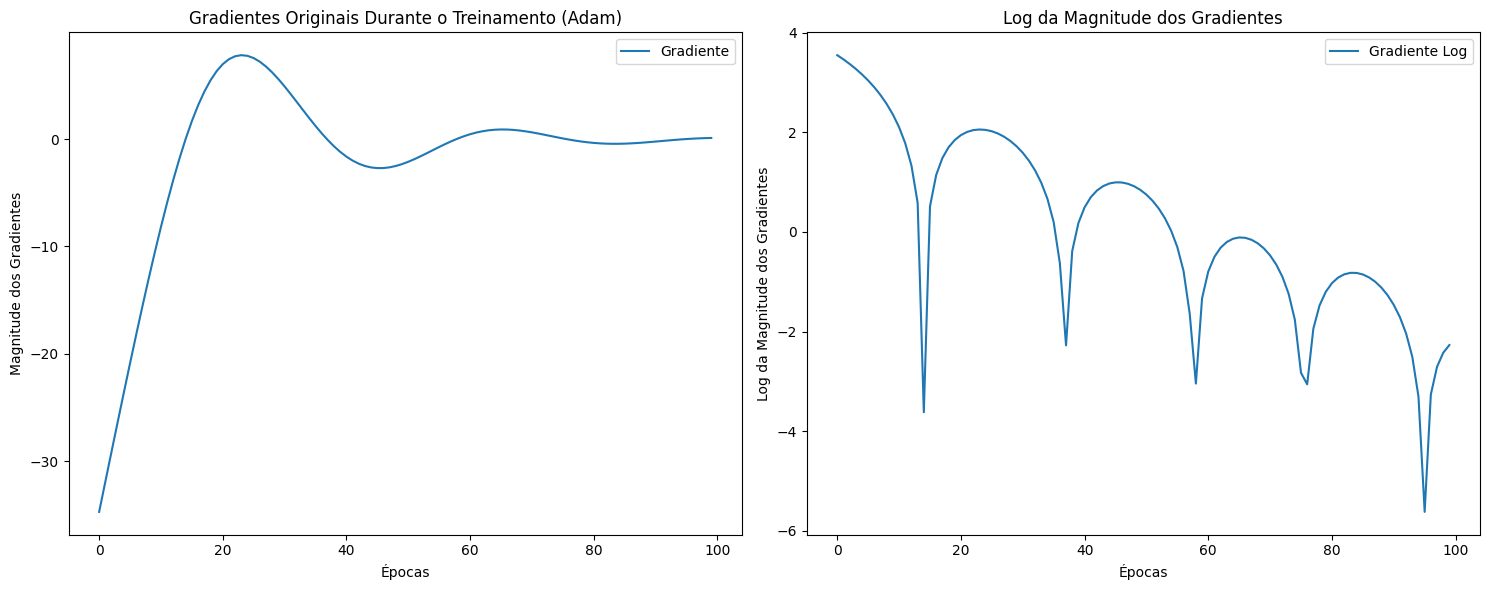

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Definindo um modelo simples
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(1, 1)
    def forward(self, x):
        return self.fc1(x)

# Inicializando o modelo e o otimizador Adam
model = SimpleModel()
optimizer = optim.Adam(model.parameters(), lr=0.1)


criterion = nn.MSELoss()

# Dados de treinamento simples
x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0]])
y_train = torch.tensor([[2.0], [4.0], [6.0], [8.0], [10.0]])


gradients = []

# Loop de treinamento
for epoch in range(100):
    optimizer.zero_grad()


    output = model(x_train)


    loss = criterion(output, y_train)

    # Calculando os gradientes
    loss.backward()


    gradients.append(model.fc1.weight.grad.clone().detach().numpy())


    optimizer.step()


gradients = torch.tensor(gradients)


gradients_log = np.log(np.abs(gradients.numpy()) + 1e-5)


fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico dos gradientes originais
axs[0].plot(gradients.numpy().squeeze())
axs[0].set_title('Gradientes Originais Durante o Treinamento (Adam)')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Magnitude dos Gradientes')
axs[0].legend(['Gradiente'], loc='upper right')

# Gráfico dos gradientes ajustados
axs[1].plot(gradients_log.squeeze())
axs[1].set_title('Log da Magnitude dos Gradientes')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Log da Magnitude dos Gradientes')
axs[1].legend(['Gradiente Log'], loc='upper right')


plt.tight_layout()


plt.show()


plt.savefig('/content/grafico_gradientes_combinados.png')


from google.colab import files
files.download('/content/grafico_gradientes_combinados.png')
